In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import warnings

with warnings.catch_warnings():
     warnings.filterwarnings("ignore")
     bc = load_breast_cancer()
     X, y = bc.data, bc.target


In [6]:
data = load_breast_cancer()

In [7]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
print("Feature Names:", data.feature_names)

Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [10]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [11]:
data = load_breast_cancer()
X = data.data
y = data.target
scaler = StandardScaler()
X = scaler.fit_transform(X) #standardizing the features for better optimization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #80% train, 20% test

X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train] #adding 1s column
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]


In [12]:
class LogisticRegression:
    def __init__(self, learning_rate=0.5, iterations=5000, threshold=0.5):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.threshold = threshold
        self.weights = None
        self.losses = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, X, y, w):
        n = len(y)
        p = self.sigmoid(np.dot(X, w))
        J = -(1/n) * np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))  # Logistic loss function
        grad = (1/n) * np.dot(X.T, (p - y))  # Gradient of the cost function
        return J, grad

    def optimize_model(self, X, y):
        self.weights = np.zeros(X.shape[1])  # Initialize weights to zeros
        cost, grad = self.cost_function(X, y, self.weights)
        
        for i in range(self.iterations):
            # weights updated using gradient descent
            self.weights -= self.learning_rate * grad
            
            # new cost and gradient
            new_cost, grad = self.cost_function(X, y, self.weights)
            
            if i % 100 == 0:
                self.losses.append(new_cost)
            
            # checking for convergence
            if np.abs(new_cost - cost) < 1e-6:  #covergence limit set a v small value
                print(f'Converged after {i} iterations')
                return self.weights, new_cost
            cost = new_cost
        
        print('Maximum number of iterations reached')
        return self.weights, cost

    def predict(self, X):
        predictions = self.sigmoid(np.dot(X, self.weights))
        return [1 if p >= self.threshold else 0 for p in predictions]

    def score(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)


# initialize and train the logistic regression model
log_reg = LogisticRegression(learning_rate=0.5, iterations=5000, threshold=0.5)
log_reg.optimize_model(X_train, y_train)

# model on the test set
accuracy = log_reg.score(X_test, y_test)
print(f'Model accuracy on test set: {accuracy * 100:.2f}%')

# weights printed
print(f"Final coefficient vector w: {log_reg.weights}")

Maximum number of iterations reached
Model accuracy on test set: 97.37%
Final coefficient vector w: [-0.45195738 -0.06959707  0.09065251  0.09536877 -0.19700908  0.0645314
  2.304682   -1.58462214 -2.96092468  1.03828378 -0.71464459 -3.45745359
  0.58768797 -0.69281689 -2.4470078  -0.82149303  0.65564003  1.21595153
 -0.96870032  1.24451709  1.39520025 -1.6643844  -2.92425157 -0.42920767
 -1.69708847 -0.20595415  0.20806271 -2.32232196 -1.34801825 -2.79835936
 -0.08655739]


In [13]:
def predict(self, X): #returns predicted class labels
        probabilities = self.sigmoid(np.dot(X, self.weights)) #linear combination of features & weights
        return np.array([1 if p >= self.threshold else 0 for p in probabilities]) 

def score(self, X, y): #computes accuracy by comparing predicted & actual labels
        predictions = self.predict(X) #predictions for x
        return np.mean(predictions == y) 

y_pred = log_reg.predict(X_test)  # predictions from the trained model

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Confusion Matrix:
 [[42  1]
 [ 2 69]]
Precision: 0.99
Recall: 0.97
F1 Score: 0.98


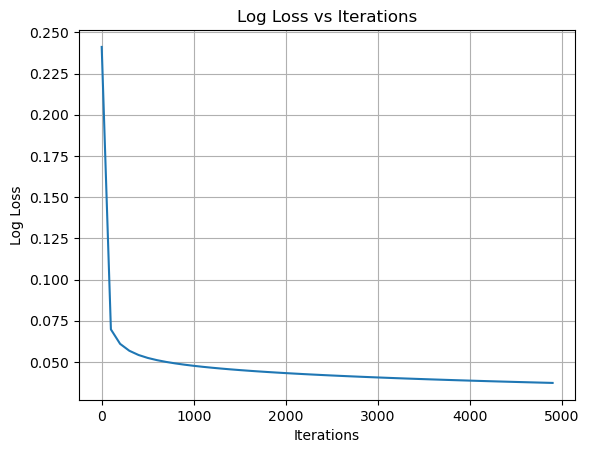

In [14]:
plt.plot(range(0, len(log_reg.losses)*100, 100), log_reg.losses)  # The x-axis is the iteration number
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('Log Loss vs Iterations')
plt.grid(True)
plt.show()

In [15]:
#ranges for hyperparameters
learning_rates = [0.01, 0.1, 0.5, 1.0, 10]
iterations_list = [1000, 5000, 10000, 500000]
thresholds = [0.3, 0.5, 0.7]

In [ ]:
# grid search over hyperparameters
best_accuracy = 0
best_params = {}

for learning_rate in learning_rates:
    for iterations in iterations_list:
        for threshold in thresholds:
            log_reg = LogisticRegression(learning_rate=learning_rate, iterations=iterations, threshold=threshold)
            log_reg.optimize_model(X_train, y_train)  # training the model
            
            # model's evaluation on the validation set (X_test, y_test)
            accuracy = log_reg.score(X_test, y_test)
            print(f"Testing with lr={learning_rate}, iters={iterations}, threshold={threshold}: Accuracy={accuracy * 100:.2f}%")
            
            # best hyperparameters based on validation accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'learning_rate': learning_rate, 'iterations': iterations, 'threshold': threshold}

print("\nBest Hyperparameters found:")
print(f"Learning Rate: {best_params['learning_rate']}")
print(f"Iterations: {best_params['iterations']}")
print(f"Threshold: {best_params['threshold']}")
print(f"Best Validation Accuracy: {best_accuracy * 100:.2f}%")

Maximum number of iterations reached
Testing with lr=0.01, iters=1000, threshold=0.3: Accuracy=96.49%
Maximum number of iterations reached
Testing with lr=0.01, iters=1000, threshold=0.5: Accuracy=99.12%
Maximum number of iterations reached
Testing with lr=0.01, iters=1000, threshold=0.7: Accuracy=95.61%
Maximum number of iterations reached
Testing with lr=0.01, iters=5000, threshold=0.3: Accuracy=98.25%
Maximum number of iterations reached
Testing with lr=0.01, iters=5000, threshold=0.5: Accuracy=98.25%
Maximum number of iterations reached
Testing with lr=0.01, iters=5000, threshold=0.7: Accuracy=95.61%
Maximum number of iterations reached
Testing with lr=0.01, iters=10000, threshold=0.3: Accuracy=98.25%
Maximum number of iterations reached
Testing with lr=0.01, iters=10000, threshold=0.5: Accuracy=98.25%
Maximum number of iterations reached
Testing with lr=0.01, iters=10000, threshold=0.7: Accuracy=96.49%
Converged after 10967 iterations
Testing with lr=0.01, iters=500000, threshold=

/tmp/ipykernel_3230154/3015121937.py:15: RuntimeWarning: divide by zero encountered in log
  J = -(1/n) * np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))  # Logistic loss function
/tmp/ipykernel_3230154/3015121937.py:15: RuntimeWarning: invalid value encountered in multiply
  J = -(1/n) * np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))  # Logistic loss function


Maximum number of iterations reached
Testing with lr=10, iters=1000, threshold=0.3: Accuracy=97.37%
Maximum number of iterations reached
Testing with lr=10, iters=1000, threshold=0.5: Accuracy=95.61%
Maximum number of iterations reached
Testing with lr=10, iters=1000, threshold=0.7: Accuracy=94.74%
Maximum number of iterations reached
Testing with lr=10, iters=5000, threshold=0.3: Accuracy=93.86%
Maximum number of iterations reached
Testing with lr=10, iters=5000, threshold=0.5: Accuracy=93.86%
Maximum number of iterations reached
Testing with lr=10, iters=5000, threshold=0.7: Accuracy=93.86%
Maximum number of iterations reached
Testing with lr=10, iters=10000, threshold=0.3: Accuracy=93.86%
Maximum number of iterations reached
Testing with lr=10, iters=10000, threshold=0.5: Accuracy=93.86%
Maximum number of iterations reached
Testing with lr=10, iters=10000, threshold=0.7: Accuracy=93.86%


/tmp/ipykernel_3230154/3015121937.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Maximum number of iterations reached
Testing with lr=10, iters=500000, threshold=0.3: Accuracy=93.86%


The best configuration is the one with the highest accuracy which is 99.12% in this case. Here, Learning rate (lr) = 0.01, Iterations = 1000, Threshold = 0.5, and these would be the best parameters found. 